# Lista 01 - EDA + Visualização

Adicione os imports abaixo!

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Exercício 01:
Em determinadas épocas do ano a venda de certos produtos sofre um aumento significativo. Um exemplo disso, são as vendas de sorvete que aumentam bastante no verão. Além do sorvete, outros itens como protetor solar e vestuário de banho podem ganhar maior atenção durante essa época do ano enquanto outros produtos podem não ser tão valorizados. Neste primeiro exercício, implemente a função abaixo que recebe quatro listas e cria um dataframe das quatro. A primeira lista será o índice do seu dataframe. A última, o nome das colunas.


Por exemplo, ao passar:

```python
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

names = ["icecream", "sunglasses", "coats"]

cria_df(labels, ice_cream, sunglasses, coats, names)
```

A tabela deve ser da forma:

```
       icecream   sunglasses   coats
------------------------------------
Jan     3000        1000        10
Fev     2600        800         20
...     ...         ...        ...
Dez     1900        900         20
```

__Dica__

Usar `list(zip(colunas))`. Ou, montar um dicionário na mão.

In [2]:
def cria_df(labels, coluna1, coluna2, coluna3, names):
    lista_de_listas = [coluna1, coluna2, coluna3]
    dictionary = {k:v for k, v in zip(names, lista_de_listas)}
    data = pd.DataFrame( dictionary ,index = labels)

    return data

In [3]:
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

names = ["icecream", "sunglasses", "coats"]    
df = cria_df(labels, ice_cream, sunglasses, coats, names)
df

,coats,icecream,sunglasses
Jan,10,3000,1000
Fev,20,2600,800
Mar,80,1400,100
Abr,120,1500,70
Mai,100,1200,50
Jun,500,500,190
Jul,900,300,60
Ago,780,400,50
Set,360,700,100
Out,100,600,120


# Exercício 02:

Agora, crie uma função que recebe seu dataframe e crie um gráfico de linhas mostrando a evolução das vendas dos produtos ao longo dos meses em porcentagem. Ou seja, um gráfico relacionando a porcentagem de produtos vendidos naquele mês em relação ao ano como um todo para as vendas de sorvetes, óculos de sol e casacos.

Seu gráfico deve parecer com o plot abaixo:

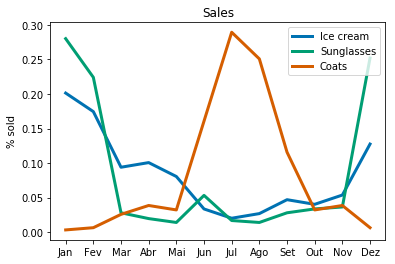

In [4]:
# Note as duas linhas de código abaixo não é a resposta!!! Estou apenas mostrando a imagem que espero!

from IPython.display import Image
Image('plot1.png')

        coats  icecream  sunglasses
Jan  0.003215  0.201342    0.280112
Fev  0.006431  0.174497    0.224090
Mar  0.025723  0.093960    0.028011
Abr  0.038585  0.100671    0.019608
Mai  0.032154  0.080537    0.014006
Jun  0.160772  0.033557    0.053221
Jul  0.289389  0.020134    0.016807
Ago  0.250804  0.026846    0.014006
Set  0.115756  0.046980    0.028011
Out  0.032154  0.040268    0.033613
Nov  0.038585  0.053691    0.036415
Dez  0.006431  0.127517    0.252101


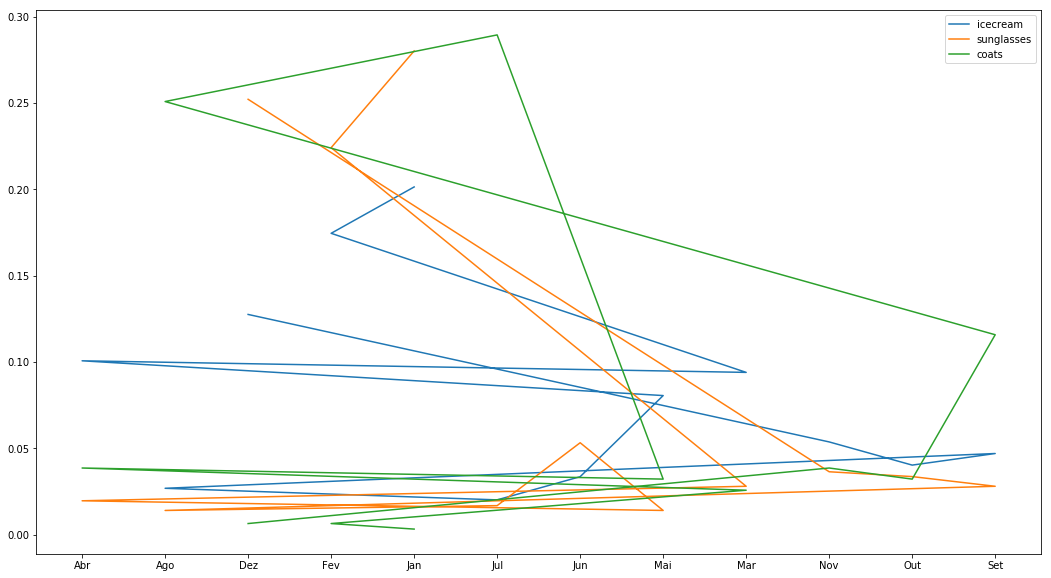

In [5]:
# YOUR CODE HERE
def product_plot(df):
    df_totals = df.sum()
    df_percentage = df/df_totals
    print(df_percentage)
    plt.figure(figsize=(18, 10))
    plt.plot(df_percentage['icecream'])
    plt.plot(df_percentage['sunglasses'])
    plt.plot(df_percentage['coats'])
    plt.legend()

product_plot(df)


# Exercício 03:

Utilizando os mesmos dados do exercício anterior, crie uma função que faz um scatter plot entre **icecream** e as outras duas colunas..


__Dicas:__  
1. "_Correlação não é o mesmo que causalidade!_"
1. Abaixo novamente mostramos exemplos de figuras que você pode gerar.

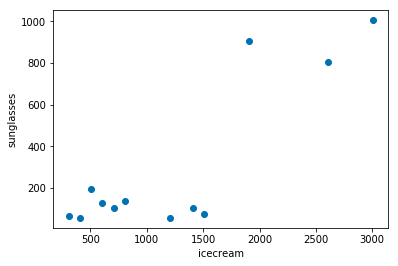

In [6]:
Image('plot2.png')

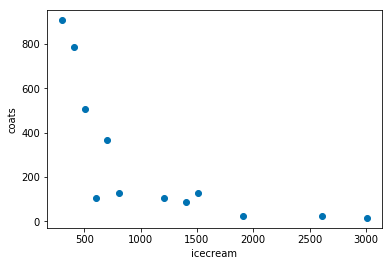

In [7]:
Image('plot3.png')

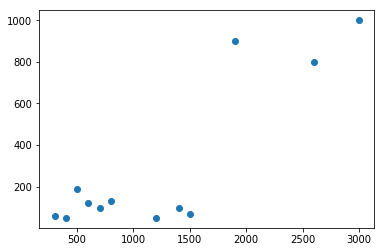

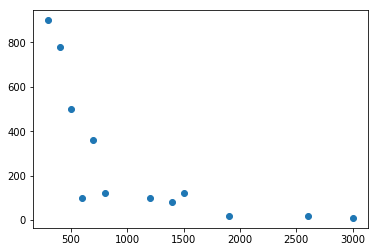

In [8]:
#Exemplo:
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
ice_cream_series = pd.Series(ice_cream)
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
sunglasses_series = pd.Series(sunglasses)
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]


def scatter(df):
    # YOUR CODE HERE
    plt.plot(df['icecream'], df['sunglasses'], linestyle='none', marker='o') 
    plt.show()
    plt.plot(df['icecream'], df['coats'], linestyle='none', marker='o')
    plt.show()

scatter(df)

# Exercício 04:


Agora vamos trabalhar com dados reais. Na mesma pasta deste notebook, encontra-se um `json` com os dados do site http://www.capitaldoscandidatos.info/. Sua tarefa será usar funções como `groupby` e `hist` para analisar tais dados. Diferente das perguntas anteriores, não vamos mais pedir para que você implemente funções. Ou seja, pode trabalhar diretamente nas células do Jupyter estilo um cientista de dados. 

Sua primeira tarefa será indicar os 10 partidos que em média mais lucraram depois da primeira eleição. Ou seja, a diferença de patrimônio entre 2014 (eleição 1) e 2018 (eleição 2). Assim, a célula de solução (abaixo, depois da célula que carrega os dados), deve criar uma variável `resposta`. A mesma é uma série pandas com os top 10 partidos que mais lucraram em média.

__Dicas__

Não necessariamente para este trabalho, mas é sempre bom lembrar:

1. Você já aprendeu a programar e quando estiver repetindo muito chamadas, é um bom sinal que deve criar um função.
2. Notebooks não são IDEs, use para trabalho exploratório.

In [9]:
df = pd.read_json('capital.json')

In [10]:
# YOUR CODE HERE
pd.options.display.float_format = '{:20,.2f}'.format

df['patrimonio_diff'] = df['patrimonio_eleicao_2'] - df['patrimonio_eleicao_1']
df_patrimonio  = df[['patrimonio_diff','sigla_partido']].groupby('sigla_partido').mean().sort_values(by='patrimonio_diff', ascending=False)
df_patrimonio.columns = [['patrimonio_diff_mean']]
df_patrimonio

,patrimonio_diff_mean
sigla_partido,
SOLIDARIED,"1,179,012.79"
PR,"849,841.97"
PATRI,"719,554.25"
PSL,"671,091.04"
PSD,"628,832.43"
PP,"615,142.86"
PHS,"611,250.55"
DEM,"603,158.35"
PODE,"473,583.15"


Plote sua resposta abaixo!

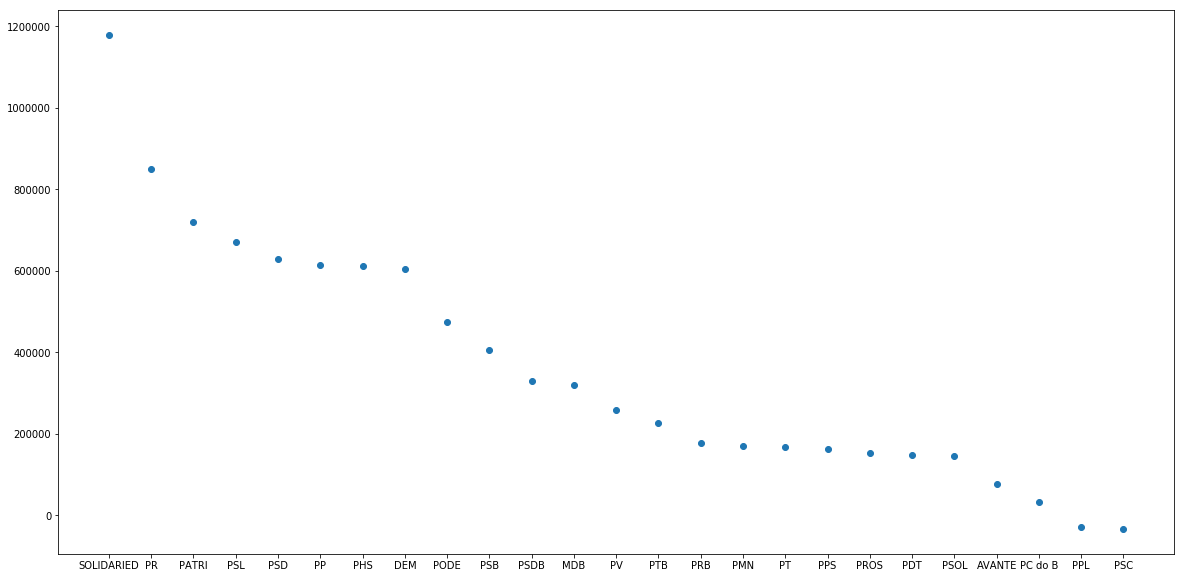

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df_patrimonio,linestyle='none', marker='o') 
plt.show()

# Exercício 05:


Por fim, plote o histograma dos valores acima (lucro entre eleições) para todos os partidos. Brinque com valores diferentes do número de bins e interprete os dados. Para que a correção funcione, use a chamada da seguinte forma. Brinque também com variações de histograma normalizado ou não.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d9dd45b38>]],
      dtype=object)

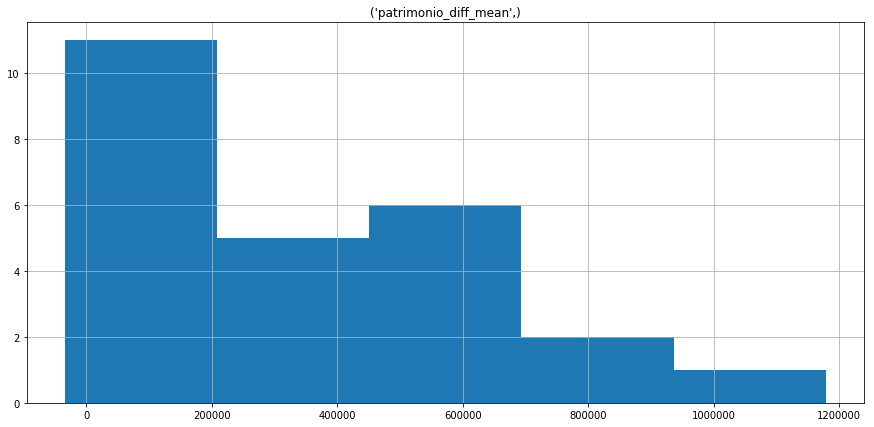

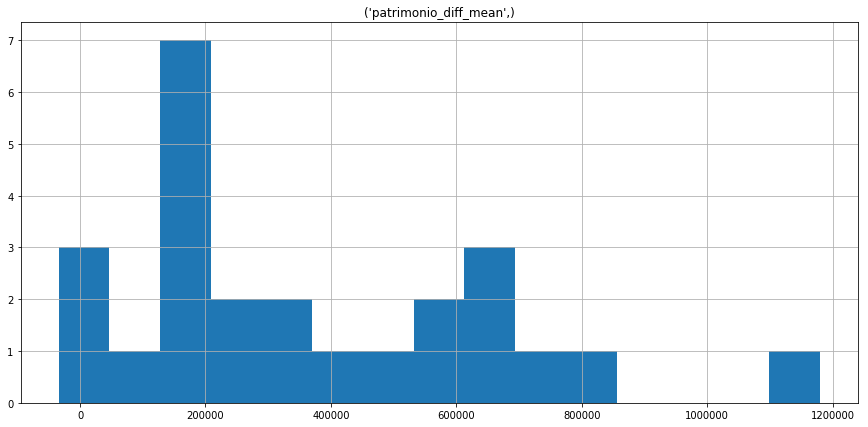

In [12]:
#df = pd.read_json('capital.json') # carregando os dados +1 vez, caso tenha alterado.
#Comentei acima pois não modifiquei o df original 

#df_patrimonio.plot(kind='hist',bins=[0,100000,200000,300000,400000,500000, 600000,700000, 800000,900000,1000000],rwidth=0.8)
df_patrimonio.hist(bins = 5,figsize = (15,7))

#Testando com um numero maior de bins
df_patrimonio.hist(bins = 15, figsize = (15,7))

#Tentativa obviamente falha de criar bins "maiores" que outros a fim de agrupar os dados,deu errado pois
# o delta entre um bin e o proximo deve ser igual entre todos os bins consecutivos
#df_patrimonio.plot(kind='hist',bins=[0,100000,200000,300000,400000,500000, 600000,700000, 100000],rwidth=0.8)



/home/joaocouto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


<BarContainer object of 10 artists>

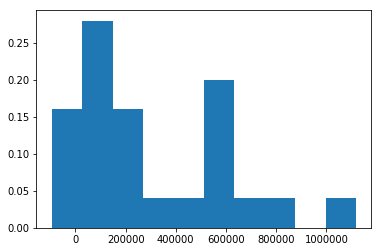

In [13]:
#com normalizacao de altura
#df_patrimonio = df_patrimonio/df_patrimonio.sum()
#df_patrimonio.hist(bins = 30,figsize = (15,7))

#tentativa 'falha' de normalizacao da area
results, edges = np.histogram(df_patrimonio['patrimonio_diff_mean'], normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)

/home/joaocouto/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


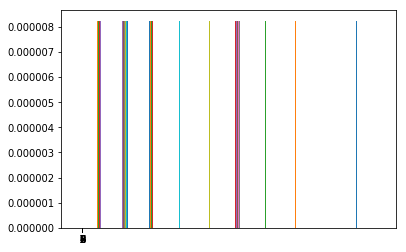

In [14]:

#Nova tentativa, ainda mais absurdamente falha, de plotar o histograma normalizado por area
x,bins,p=plt.hist(df_patrimonio['patrimonio_diff_mean'], normed=1)
plt.xticks( np.arange(10) ) # 10 ticks on x axis
plt.show()

In [15]:
# ^ É eu acho que deu errado 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d9dcf9550>]],
      dtype=object)

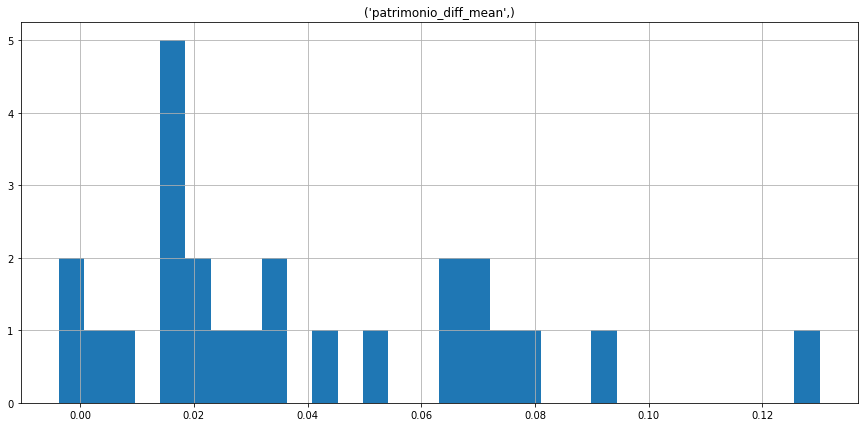

In [16]:
#com normalizacao dos valores 
df_patrimonio = df_patrimonio/df_patrimonio.sum()
df_patrimonio.hist(bins = 30,figsize = (15,7))